In [21]:
import pandas as pd
import matplotlib.pyplot as plt

netflix_df=pd.read_csv('netflix_data.csv')
netflix_df.head(100)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
95,s134,Movie,7 años,Roger Gual,"Paco León, Juana Acosta, Juan Pablo Raba, Alex...",Spain,"October 27, 2016",2016,77,Loyalties are tested and cruelties revealed wh...,Dramas
96,s136,Movie,7 Din Mohabbat In,"Meenu Gaur, Farjad Nabi","Mahira Khan, Sheheryar Munawar, Javed Sheikh, ...",Pakistan,"May 15, 2019",2018,137,Given just seven days by a genie to find a gir...,Comedies
97,s137,Movie,7 Khoon Maaf,Vishal Bhardwaj,"Priyanka Chopra, Neil Nitin Mukesh, John Abrah...",India,"August 2, 2018",2011,148,"Spiced liberally with black comedy, this Bolly...",Dramas
98,s144,Movie,90 ML,Anita Udeep,"Oviya, Masoom Shankar, Bommu Lakshmi, Monisha ...",India,"August 13, 2019",2019,123,Four friends shake up their lives when they me...,Comedies


What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called `duration.`

In [61]:
movie_duration_1990s=netflix_df[(netflix_df['release_year']>=1990)&
                                (netflix_df['release_year']<2000)&
                                (netflix_df['type']=='Movie')]
duration=movie_duration_1990s['duration'].mode()[0]
print(duration)


94


### A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as `short_movie_count`.

In [60]:
short_movies_1990s=netflix_df[(netflix_df['release_year']>=1990)&
                              (netflix_df['release_year']<2000)&
                              (netflix_df['type']=='Movie')&
                              (netflix_df['duration']<90)&
                              (netflix_df['genre']=='Action')]
short_movies_count=len(short_movies_1990s)
for index,movies in short_movies_1990s.iterrows():
    print(movies['title'])
    
print(short_movies_count)
    

EVANGELION: DEATH (TRUE)²
Hero
Look Out, Officer
Passenger 57
Rumble in the Bronx
The Bare-Footed Kid
The End of Evangelion
7


### The number of drama movies released in the 2000s with a duration of more than 120 minutes.


In [13]:
movies_2000s=netflix_df[(netflix_df['release_year']==2000)&
                        (netflix_df['type']=='Movie')&
                        (netflix_df['duration']>120)
                       ]
movies_2000s_count=len(movies_2000s)
print(movies_2000s_count)
movies_2000s

9


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
831,s1263,Movie,Chal Mere Bhai,David Dhawan,"Sanjay Dutt, Salman Khan, Karisma Kapoor, Dali...",India,"December 31, 2019",2000,132,"When a secretary saves her tycoon boss's life,...",Comedies
1385,s2201,Movie,Fiza,Khalid Mohamed,"Karisma Kapoor, Jaya Bhaduri, Hrithik Roshan, ...",India,"August 2, 2018",2000,163,Fiza's brother disappears during Mumbai's horr...,Dramas
1623,s2589,Movie,Hamara Dil Aapke Paas Hai,Satish Kaushik,"Anil Kapoor, Aishwarya Rai Bachchan, Sonali Be...",India,"March 1, 2018",2000,158,Love blooms when kind-hearted Avinash takes in...,Dramas
2204,s3478,Movie,Kya Kehna,Kundan Shah,"Preity Zinta, Saif Ali Khan, Anupam Kher, Fari...",India,"April 1, 2018",2000,149,A young university student's world is shaken a...,Dramas
2977,s4758,Movie,Papa the Great,Bhagyaraj,"Krishan Kumar, Nagma, Satya Prakash, Master Bo...",India,"December 8, 2017",2000,137,"After witnessing a murder, a meek family man m...",Comedies
3033,s4846,Movie,Phir Bhi Dil Hai Hindustani,Aziz Mirza,"Shah Rukh Khan, Juhi Chawla, Paresh Rawal, Sat...",India,"April 1, 2018",2000,159,"In this Bollywood entertainment, two journalis...",Comedies
3109,s5001,Movie,Pukar,Rajkumar Santoshi,"Anil Kapoor, Madhuri Dixit, Namrata Shirodkar,...",India,"March 1, 2018",2000,165,A notorious terrorist manipulates an Indian ar...,Action
3583,s5733,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,"August 1, 2019",2000,130,A retired engineer agrees to help NASA prevent...,Action
4683,s7559,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,"January 1, 2020",2000,130,When Claire Spencer starts hearing ghostly voi...,Horror Movies


<Figure size 640x480 with 0 Axes>

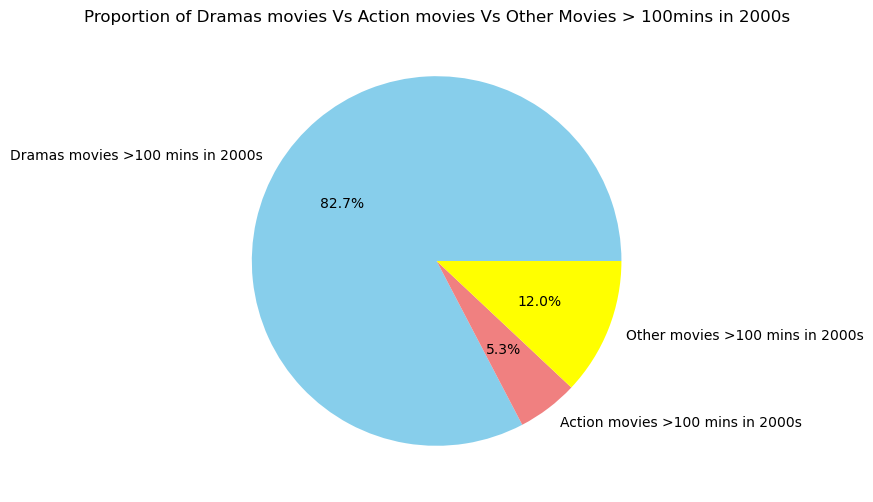

In [59]:
data={
    'Dramas movies >100 mins in 2000s':dramas_count,
    'Action movies >100 mins in 2000s':action_count
}
#other=netflix_df[(netflix_df['release_year'] == 2000) & 
#                                      (netflix_df['duration'] > 100) & 
#                                      (~netflix_df['genre'].str.contains('Action|Dramas', na=False))]

other_category_count = len(netflix_df[(netflix_df['release_year'] == 2000) & 
                                      (netflix_df['duration'] > 100) & 
                                      (~netflix_df['genre'].str.contains('Action|Dramas', na=False))])
data['Other movies >100 mins in 2000s']=other_category_count

plt.clf()
plt.figure(figsize=(8,6))
plt.pie(data.values(),labels=data.keys(),autopct='%1.1f%%',colors=['skyblue','lightcoral','yellow'])
plt.title('Proportion of Dramas movies Vs Action movies Vs Other Movies > 100mins in 2000s')
plt.show()

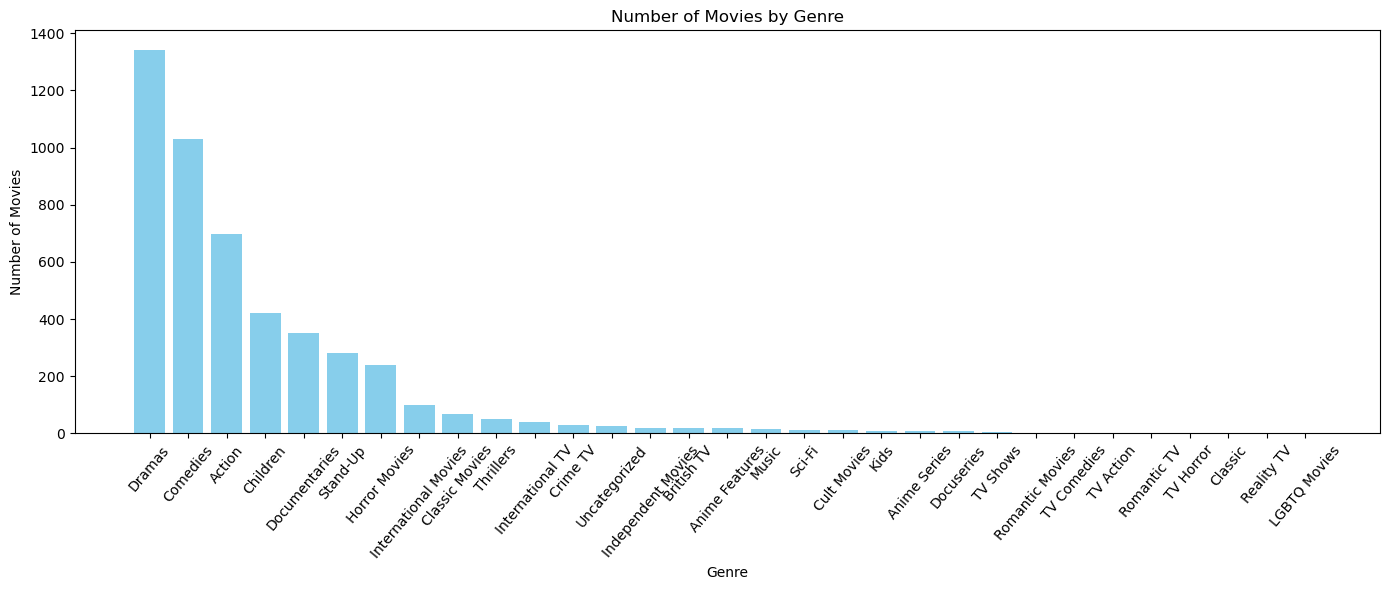

In [16]:
genre_counts = netflix_df['genre'].value_counts()

# Plot bar chart
plt.figure(figsize=(14, 6))
plt.bar(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Genre')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

In [25]:
netflix_df['date_added']=pd.to_datetime(netflix_df['date_added'], errors='coerce')

filtered_movies=netflix_df[
                           netflix_df['director']=='Robert Zemeckis'
    ] 

#get title
titles=filtered_movies['title'].tolist()
print(titles)
filtered_movies

['The Polar Express', 'What Lies Beneath']


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
4213,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,2021-01-01,2004,100,"In this warm-hearted tale, a young boy's faith...",Children
4683,s7559,Movie,What Lies Beneath,Robert Zemeckis,"Harrison Ford, Michelle Pfeiffer, Diana Scarwi...",United States,2020-01-01,2000,130,When Claire Spencer starts hearing ghostly voi...,Horror Movies


In [31]:
movies_added_2015=netflix_df[(netflix_df['date_added'].dt.year==2015)&
                             (netflix_df['type']=='Movie')]
                    
top5_movies_titles_added_2015=movies_added_2015[['title']].head(5)
top5_movies_titles_added_2015

,title
91,6 Years
173,A Very Murray Christmas
227,Advantageous
373,Anjelah Johnson: Not Fancy
382,Anthony Jeselnik: Thoughts and Prayers


<Figure size 640x480 with 0 Axes>

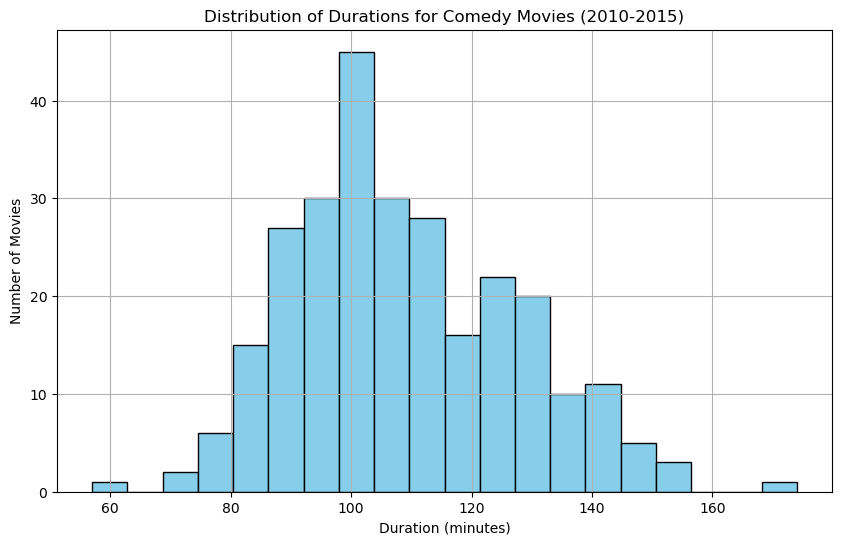

108.98897058823529

In [34]:
comedy_movies_2010_to_2015=netflix_df[(netflix_df['release_year']>=2010)&
                               (netflix_df['release_year']<=2015)&
                               (netflix_df['genre']=='Comedies')]
average_durations=comedy_movies_2010_to_2015['duration'].mean()

plt.clf()
plt.figure(figsize=(10, 6))
plt.hist(comedy_movies_2010_to_2015['duration'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.title('Distribution of Durations for Comedy Movies (2010-2015)')
plt.grid(True)
plt.show()
average_durations

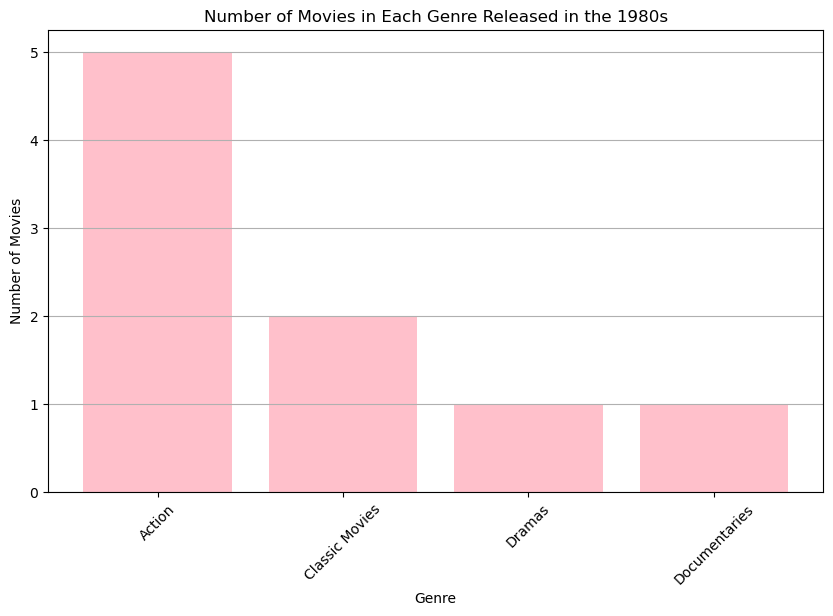

genre
Action            5
Classic Movies    2
Dramas            1
Documentaries     1
Name: count, dtype: int64

In [58]:
movies_released_1980=netflix_df[netflix_df['release_year']==1980]
genre_count_1980=movies_released_1980['genre'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(genre_count_1980.index,genre_count_1980.values,color='pink')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies in Each Genre Released in the 1980s')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
genre_count_1980

In [50]:
dramas_2000_greater_than_100=netflix_df[(netflix_df['genre']=='Dramas')&
                                     (netflix_df['release_year']<=2000)&
                                     (netflix_df['duration']>100)]

dramas_count=len(dramas_2000_less_than_100)
dramas_2000_greater_than_100

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,2018-04-01,1993,101,At the center of this engrossing melodrama is ...,Dramas
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,2017-06-01,1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas
240,s344,Movie,Agneepath,Mukul Anand,"Amitabh Bachchan, Mithun Chakraborty, Danny De...",India,2020-04-01,1990,174,A boy grows up to become a gangster in pursuit...,Dramas
315,s456,Movie,American Beauty,Sam Mendes,"Kevin Spacey, Annette Bening, Thora Birch, Wes...",United States,2020-01-01,1999,122,While struggling to endure his tightly wound w...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
4304,s6921,Movie,The Talented Mr. Ripley,Anthony Minghella,"Matt Damon, Gwyneth Paltrow, Jude Law, Cate Bl...",United States,2020-01-01,1999,139,A charming sociopath maneuvers into the lush l...,Dramas
4436,s7130,Movie,Together For Eternity,Sooraj R. Barjatya,"Salman Khan, Karisma Kapoor, Saif Ali Khan, Ta...",India,2020-02-01,1999,176,A scheming matriarch plots to cut off her disa...,Dramas
4530,s7303,Movie,Ujala,Naresh Saigal,"Mala Sinha, Shammi Kapoor, Raaj Kumar, Leela C...",India,2017-10-15,1959,143,An honest man dreams of a better life for his ...,Dramas
4672,s7536,Movie,West Beirut,Ziad Doueiri,"Rami Doueiri, Mohamad Chamas, Rola Al Amin, Ca...",France,2020-10-19,1999,106,Three intrepid teens roam the streets of Beiru...,Dramas


In [53]:
action_2000_greater_than_100=netflix_df[(netflix_df['genre']=='Action')&
                                        (netflix_df['release_year']==2000)&
                                        (netflix_df['duration']>100)]
action_count=len(action_2000_greater_than_100)
action_2000_greater_than_100


,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
981,s1547,Movie,"Crouching Tiger, Hidden Dragon",Ang Lee,"Chow Yun Fat, Michelle Yeoh, Zhang Ziyi, Chang...",Taiwan,2019-03-01,2000,120,A young woman in ancient China longs for an ad...,Action
3109,s5001,Movie,Pukar,Rajkumar Santoshi,"Anil Kapoor, Madhuri Dixit, Namrata Shirodkar,...",India,2018-03-01,2000,165,A notorious terrorist manipulates an Indian ar...,Action
3583,s5733,Movie,Space Cowboys,Clint Eastwood,"Clint Eastwood, Tommy Lee Jones, Donald Suther...",United States,2019-08-01,2000,130,A retired engineer agrees to help NASA prevent...,Action
3792,s6095,Movie,The Art of War,Christian Duguay,"Wesley Snipes, Anne Archer, Maury Chaykin, Mar...",United States,2020-07-01,2000,117,"Framed for the murder of an ambassador, a form...",Action
